# Classification 실습

### 1. 데이터 수집 및 선택

In [1]:
import pandas as pd
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### 2. 데이터 전처리

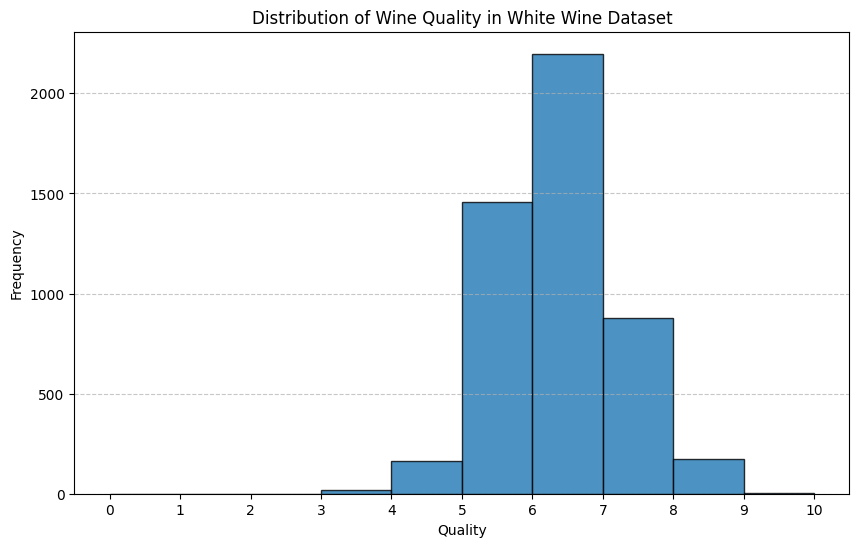

In [2]:
import matplotlib.pyplot as plt

# Plot the distribution of the 'quality' column in white_wine dataset
plt.figure(figsize=(10, 6))
plt.hist(white_wine['quality'], bins=range(0, 11), edgecolor='k', alpha=0.8)
plt.title('Distribution of Wine Quality in White Wine Dataset')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.xticks(range(0, 11))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
white_wine['quality'] = white_wine['quality'].apply(lambda x: 1 if x >= 7 else 0)

In [4]:
white_wine['quality'].value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [5]:
X = white_wine.drop(columns=['quality'])
y = white_wine['quality']

### 3. 특징 선택

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

select_kbest = SelectKBest(score_func=chi2, k=5)
X_selected = select_kbest.fit_transform(X, y)

selected_features = X.columns[select_kbest.get_support()]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['fixed acidity', 'residual sugar', 'free sulfur dioxide',
       'total sulfur dioxide', 'alcohol'],
      dtype='object')


### 4. 모델 선택

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}


### 5. 데이터 분할 & 6. 모델 훈련 & 7. 모델 예측

In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# StratifiedKFold 초기화: 데이터셋을 5개의 폴드로 나누고, 각 폴드에 대해 클래스 비율이 동일하도록 설정합니다.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)

# 결과를 저장할 딕셔너리 초기화
results = {}

# 각 분류기(Classifier)에 대해 반복
for name, classifier in classifiers.items():
    accuracy_scores = []  # 각 분류기의 정확도를 저장할 리스트 초기화

    # Stratified K-Fold 교차 검증 수행
    for train_index, test_index in skf.split(X_selected, y):
        # 훈련 세트와 테스트 세트 분할
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 분류기 학습
        classifier.fit(X_train, y_train)

        # 예측 수행
        y_pred = classifier.predict(X_test)

        # 정확도 계산 및 저장
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # 각 분류기의 평균 정확도 계산
    mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)

    # 결과 딕셔너리에 저장
    results[name] = mean_accuracy

# 결과 출력
for clf_name, mean_accuracy in results.items():
    print(f"{clf_name} - Mean Accuracy: {mean_accuracy:.4f}")

Logistic Regression - Mean Accuracy: 0.8038
Naive Bayes - Mean Accuracy: 0.7811
SVM - Mean Accuracy: 0.7836
Decision Tree - Mean Accuracy: 0.8291
Random Forest - Mean Accuracy: 0.8718
KNN - Mean Accuracy: 0.7881


### 분류 결과 평가 지표

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# StratifiedKFold 초기화: 데이터셋을 5개의 폴드로 나누고, 각 폴드에 대해 클래스 비율이 동일하도록 설정합니다.
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=64)

# 결과를 저장할 딕셔너리 초기화
results = {}

# 각 분류기(Classifier)에 대해 반복
for name, classifier in classifiers.items():
    accuracy_scores = []  # 각 분류기의 정확도를 저장할 리스트 초기화
    precision_scores = []  # 각 분류기의 정밀도를 저장할 리스트 초기화
    recall_scores = []  # 각 분류기의 재현율을 저장할 리스트 초기화
    f1_scores = []  # 각 분류기의 F1 점수를 저장할 리스트 초기화

    # Stratified K-Fold 교차 검증 수행
    for train_index, test_index in skf.split(X_selected, y):
        # 훈련 세트와 테스트 세트 분할
        X_train, X_test = X_selected[train_index], X_selected[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # 분류기 학습
        classifier.fit(X_train, y_train)

        # 예측 수행
        y_pred = classifier.predict(X_test)

        # 각 성능 지표 계산 및 저장
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, zero_division=1))
        recall_scores.append(recall_score(y_test, y_pred, zero_division=1))
        f1_scores.append(f1_score(y_test, y_pred, zero_division=1))

    # 각 분류기의 평균 성능 지표 계산
    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)

    # 결과 딕셔너리에 저장
    results[name] = {
        'mean_accuracy': mean_accuracy,
        'mean_precision': mean_precision,
        'mean_recall': mean_recall,
        'mean_f1': mean_f1,
    }

# 결과 출력
for clf_name, metrics in results.items():
    print(f"\n{clf_name}")
    print(f"Mean Accuracy: {metrics['mean_accuracy']:.4f}")
    print(f"Mean Precision: {metrics['mean_precision']:.4f}")
    print(f"Mean Recall: {metrics['mean_recall']:.4f}")
    print(f"Mean F1 Score: {metrics['mean_f1']:.4f}")



Logistic Regression
Mean Accuracy: 0.8038
Mean Precision: 0.6129
Mean Recall: 0.2604
Mean F1 Score: 0.3643

Naive Bayes
Mean Accuracy: 0.7811
Mean Precision: 0.4969
Mean Recall: 0.4406
Mean F1 Score: 0.4660

SVM
Mean Accuracy: 0.7836
Mean Precision: 1.0000
Mean Recall: 0.0000
Mean F1 Score: 0.0000

Decision Tree
Mean Accuracy: 0.8287
Mean Precision: 0.6000
Mean Recall: 0.6330
Mean F1 Score: 0.6153

Random Forest
Mean Accuracy: 0.8702
Mean Precision: 0.7579
Mean Recall: 0.5896
Mean F1 Score: 0.6618

KNN
Mean Accuracy: 0.7881
Mean Precision: 0.5171
Mean Recall: 0.3830
Mean F1 Score: 0.4393


# Decision Tree 결정 트리 확인

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

select_kbest = SelectKBest(score_func=chi2, k=2)
X_selected = select_kbest.fit_transform(X, y)

X_selected, y

(array([[ 20.7, 170. ],
        [  1.6, 132. ],
        [  6.9,  97. ],
        ...,
        [  1.2, 111. ],
        [  1.1, 110. ],
        [  0.8,  98. ]]),
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 4893    0
 4894    0
 4895    0
 4896    1
 4897    0
 Name: quality, Length: 4898, dtype: int64)

<Axes: >

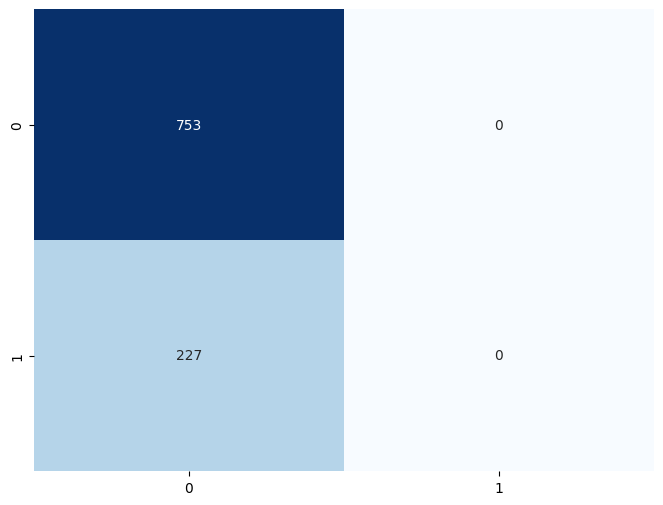

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
clf = DecisionTreeClassifier(random_state=42, max_depth=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

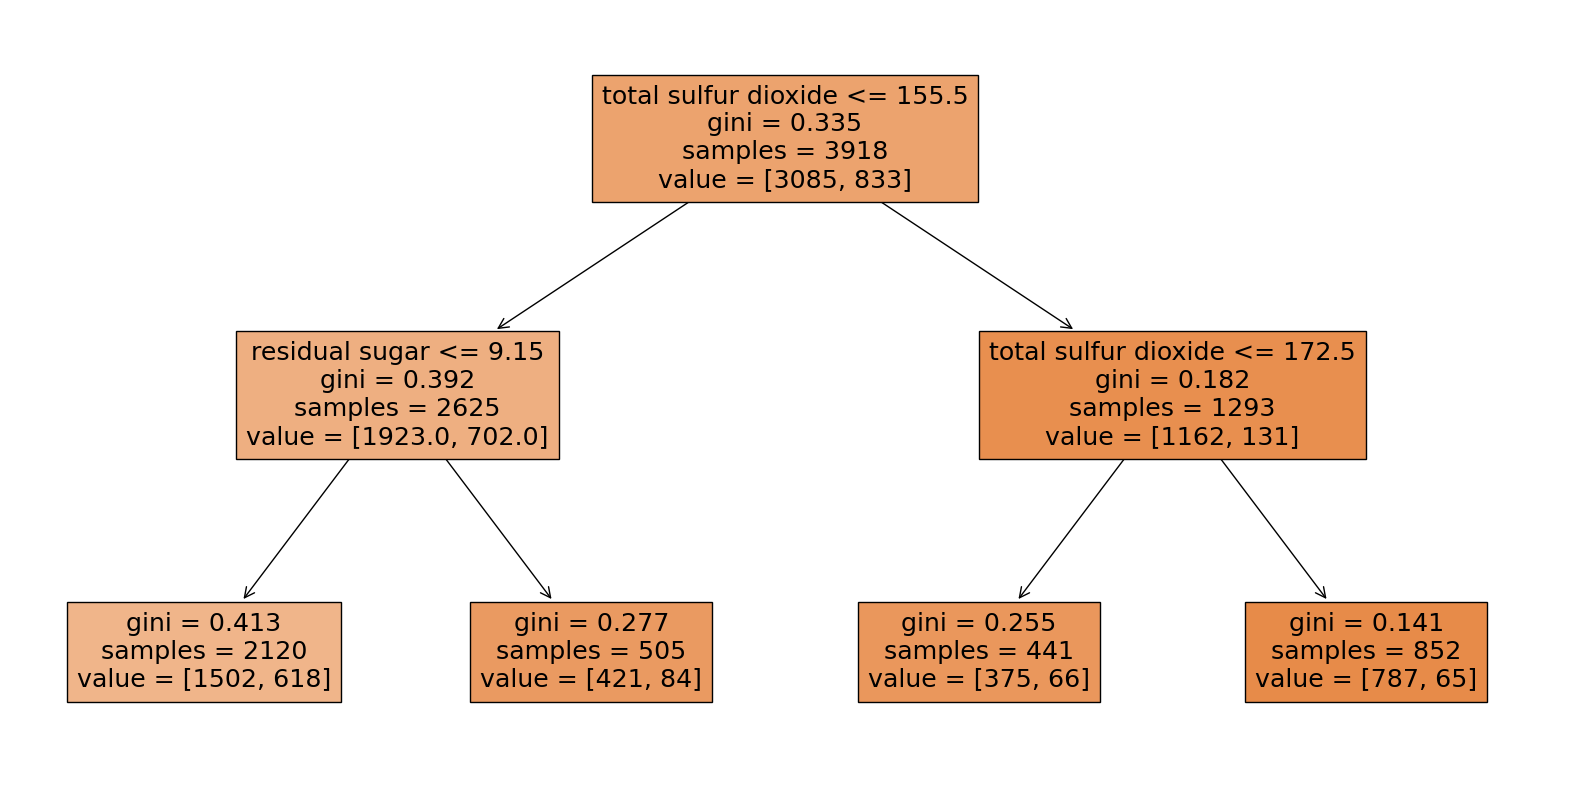

In [12]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns[select_kbest.get_support()])
plt.show()
